# Partie 3 : Premiers pas vers les méthodes de ML supervisé en python

L'idée de cette partie est de tester différentes méthodes d'apprentissage statistique supervisées usuelles. Pour cela nous allons utiliser les données issues de la table de description des individus interviewés lors de l'enquête INCA 3 sur la consommation et les habitudes alimentaires des français.

L'objectif consistera à prédire au mieux l'IMC d'un individu grâce aux diverses informations que nous détenons sur la personne. Contrairement à la partie 2 sur le clustering, il s'agit ici de d'apprentissage supervisé car nous avons en notre possessions des données labélisées. Parmi les méthodes d'apprentissages supervisé on distingue généralement deux grandes familles que sont la classification et la régression. Ici nous sommes confronté à un problème de régression puisque nous souhaitons prédire l'indice de masse corporelle exacte. Pour cela nous allons tester plusieurs méthodes différentes afin d'analyser lesquelles sont les plus efficaces sur les données que nous possédons.


## 1. Prise en main des données

Les données de l'enquête INCA3 sont disponibles sur *Data.gouv* à l'adresse suivante : https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/. Cette table contient les données des questionnaires face-à-face relatifs aux volets « Socio-économique » et « Mesures anthropométriques » et des données des questionnaires auto-administrés relatifs aux volets « Etat de santé » et « Tabagisme ». 

Elle regroupe les informations suivantes : caractéristiques socio-démographiques de l’individu (ou de son représentant dans le cas des enfants), caractéristiques
socio-démographiques de la personne de référence du foyer, niveau de vie du foyer, insécurité alimentaire, caractéristiques anthropométriques (poids, taille, indice
de masse corporelle, statut pondéral) ; statut vis-à-vis d’allergies ou d’intolérances alimentaires, types de régimes alimentaires, types d’allergies ou d’intolérances
alimentaires, régimes et histoire pondérale, statut vis-à-vis de la grossesse, de l’allaitement et de la ménopause (uniquement pour les femmes de 15 ans et plus),
statut tabagique ; indicateurs de sous ou sur-déclaration en termes de consommations alimentaires.

Nous avons préalablement selectionné un grand nombre de variables issues de cette base que nous avons ensuite enregistré dans un bucket s3. Vous pouvez les télécharger grâce à ma commande suivante :

In [1]:
import pandas as pd
import pyarrow.parquet as pq
from pyarrow import fs

In [2]:
s3 = fs.S3FileSystem(endpoint_override='https://'+'minio.lab.sspcloud.fr')

bucket = "projet-funathon"
path_data =  "2023/sujet3/diffusion/description_individu_inca.parquet"

df = pq.ParquetDataset(f'{bucket}/{path_data}', filesystem=s3).read_pandas().to_pandas()

In [3]:
df.shape

(5841, 118)

<i  class="fa fa-pencil"></i> On peut tout d'abord remarquer que le jeu de données ne semble, a priori, pas idéal pour réaliser des méthodes de machine learning très complexes avec beaucoup de paramètres à estimer. Il arrive très souvent que des méthodes plus classiques soient aussi, voire plus, efficaces que les méthodes d'apprentissage statistique. Cependant ce jeu de données peut tout à fait être utilisé à des fins pédagogiques pour comprendre les principes généraux.

In [4]:
df.head(10)

,NOIND,imc,sex_PS,tage_PS,tage_PS_mois,diplome_interv,etude_4cl_interv,situ_prof_5cl_interv,atrav_interv,trav_nuit_interv,...,nb_cigares_sem,nb_cigares_nsp,nb_pipes_jour,nb_pipes_sem,nb_pipes_nsp,fume_age_debut,fume_age_debut_nsp,fume_age_arret,fume_age_arret_nsp,bmr_kcal
0,110100101,18.282312,1,7,NaN,7.0,1,3,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1378.0930
1,110100701,23.624619,2,8,NaN,7.0,1,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352.7802
2,110100801,29.949701,1,8,NaN,7.0,1,1,NaN,4.0,...,NaN,NaN,0.0,NaN,NaN,25.0,NaN,33.0,NaN,1630.9735
3,110101201,26.141914,1,8,NaN,10.0,3,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1749.4603
4,110101401,22.420361,2,9,NaN,7.0,1,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1090.1117
5,110101601,24.034611,2,8,NaN,3.0,1,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,110101901,26.258423,1,7,NaN,9.0,2,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,110200101,26.592670,1,8,NaN,11.0,4,1,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,110300301,20.939625,1,8,NaN,7.0,1,2,1.0,NaN,...,NaN,NaN,0.0,NaN,NaN,16.0,NaN,NaN,NaN,1441.6642
9,110300501,28.601023,1,9,NaN,6.0,1,4,1.0,NaN,...,NaN,NaN,0.0,NaN,NaN,20.0,NaN,46.0,NaN,1655.5555


Tout d'abord, commençons par définir quelques constantes qui nous seront utiles pour la suite, à savoir : 
- La variable d'intérêt que nous cherchons à prédire `TARGET_VARIABLE`
- La variable correspondant au numéro d'individu `NOIND`
- Un nombre arbitraire pour afin de simplifier la réplicabilité de nos expérimentations `SEED`

In [5]:
TARGET_VARIABLE="imc"
INDEX="NOIND"
SEED=2023

**Question 1:** Comme souvent en science de la données, la partie la plus fastidieuse consiste à analyser les données à notre disposition. En vous aidant du dictionnaire accessible [ici](https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20210128-192017/notice-utilisateurs-donnees-inca3-data.gouvjanv21.pdf) déterminer l'ensemble des variables numériques. Les autres variables seront considérées comme des variables catégorielles.

In [ ]:
NUMERICAL = [
# REMPLIR ICI
]

CATEGORICAL = [x for x in df.columns if x not in NUMERICAL + [INDEX, TARGET_VARIABLE]]

FEATURES = NUMERICAL + CATEGORICAL

In [6]:
NUMERICAL = [
    "IA_score",
    "bmr_kcal",
    'nbenf',
    "enceinte_nbmois",
    'nb_cigarettes_jour',
    'nb_cigarettes_sem',
    'nb_cigares_jour',
    'nb_cigares_sem',
    'nb_pipes_jour',
    'nb_pipes_sem',
    'fume_age_debut',
    'fume_age_arret',
    'allaite_nbsem',
    "regime_nb_2dernann",
    "regime_nb_anter2dernann"
]

CATEGORICAL = [x for x in df.columns if x not in NUMERICAL + [INDEX, TARGET_VARIABLE]]

FEATURES = NUMERICAL + CATEGORICAL

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
NUMERICAL = [
    "IA_score",
    "bmr_kcal",
    'nbenf',
    "enceinte_nbmois",
    'nb_cigarettes_jour',
    'nb_cigarettes_sem',
    'nb_cigares_jour',
    'nb_cigares_sem',
    'nb_pipes_jour',
    'nb_pipes_sem',
    'fume_age_debut',
    'fume_age_arret',
    'allaite_nbsem',
    "regime_nb_2dernann",
    "regime_nb_anter2dernann"
]

CATEGORICAL = [x for x in df.columns if x not in NUMERICAL + [INDEX, TARGET_VARIABLE]]

FEATURES = NUMERICAL + CATEGORICAL
```

</details>

Une pratique courante dans les projets de machine learning c'est de commencer par spécifier une fraction de notre jeu données comme un **échantillon de test**. Cet échantillon va être utilisé à la toute fin du projet de sorte à évaluer la performance de nos modèles sur des données qu'il n'aura jamais vu auparavant. L'échantillon restant, celui **d'entrainement**, est lui utilisé pour entrainer les algorithmes et comparer leurs performances. L'idée derrière cette division est de réduire le risque de sur-apprentissage de notre modèle et d'estimer une erreur de généralisation.

**Question 2:** Créer les variables `y` et `X` correspondant respectivement à la variable d'intérêt et aux différentes features de notre jeu de données. Diviser ensuite ce jeu de données en un échantillon de train et de test en utilisant la fonction `train_test_split` de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Ne pas oublier de spécifier le `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split
# Votre code ici

In [7]:
from sklearn.model_selection import train_test_split

X = df[FEATURES]
y = df[TARGET_VARIABLE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from sklearn.model_selection import train_test_split

X = df[FEATURES]
y = df[TARGET_VARIABLE]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
```

</details>

## 2. Un modèle de régression linéaire simple

**Question 3:** Avant d'étudier différentes méthodes d'apprentissage statistique commençons par réaliser une régression linéaire classique. Pour cela, sélectionnez un petit nombre de variables $(< 10)$ qui vous semble pertinent pour prédire l'indice de masse corporelle d'une personne. Prenez à la fois des variables numériques et catégorielles.

In [ ]:
CATEGORICAL_REGRESSION = [
# A REMPLIR
]

NUMERICAL_REGRESSION = [
# A REMPLIR
]

FEATURES_REGRESSION = NUMERICAL_REGRESSION + CATEGORICAL_REGRESSION

In [8]:
CATEGORICAL_REGRESSION = [
    "sex_PS",
    "tage_PS",
   # "tage_PS_mois",
   # "diplome_interv",
   # "soins",
   # "situ_fin_3cl",
    "revenu",
    "situ_alim_statut",
   # "IA_statut",
   # "statnut",
    "poids_perception" ,
   # "menopause",
    "enceinte",
   # "enceinte_12dermois",
   # 'etude_4cl_interv',
   # 'situ_prof_5cl_interv',
   # 'atrav_interv',
   # 'trav_nuit_interv',
   # 'trav_nuit_2cl_interv',
   # 'PCS_8cl_interv',
   # 'PCS_4cl_interv',
   # 'tps_travail_interv',
   # 'vacances_interv',
   # 'RUC_4cl',
]

NUMERICAL_REGRESSION = [
    "IA_score",
   # "bmr_kcal",
   # 'nbenf',
    "enceinte_nbmois",
    "nb_prise_10kg"
]

FEATURES_REGRESSION = NUMERICAL_REGRESSION + CATEGORICAL_REGRESSION

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
CATEGORICAL_REGRESSION = [
    "sex_PS",
    "tage_PS",
   # "tage_PS_mois",
   # "diplome_interv",
   # "soins",
   # "situ_fin_3cl",
    "revenu",
    "situ_alim_statut",
   # "IA_statut",
   # "statnut",
    "poids_perception" ,
   # "menopause",
    "enceinte",
   # "enceinte_12dermois",
   # 'etude_4cl_interv',
   # 'situ_prof_5cl_interv',
   # 'atrav_interv',
   # 'trav_nuit_interv',
   # 'trav_nuit_2cl_interv',
   # 'PCS_8cl_interv',
   # 'PCS_4cl_interv',
   # 'tps_travail_interv',
   # 'vacances_interv',
   # 'RUC_4cl',
]

NUMERICAL_REGRESSION = [
    "IA_score",
   # "bmr_kcal",
   # 'nbenf',
    "enceinte_nbmois",
    "nb_prise_10kg"
]

FEATURES_REGRESSION = NUMERICAL_REGRESSION + CATEGORICAL_REGRESSION
```

</details>

In [9]:
X_train_regression = X_train[FEATURES_REGRESSION]
X_test_regression = X_test[FEATURES_REGRESSION]

In [10]:
X_train_regression.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4672 entries, 4763 to 4962
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IA_score          781 non-null    float64
 1   enceinte_nbmois   14 non-null     float64
 2   nb_prise_10kg     1699 non-null   float64
 3   sex_PS            4672 non-null   int64  
 4   tage_PS           4672 non-null   int64  
 5   revenu            4672 non-null   int64  
 6   situ_alim_statut  4672 non-null   int64  
 7   poids_perception  2572 non-null   float64
 8   enceinte          666 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 365.0 KB


Ces informations nous indiquent qu'il y a plusieurs variables qui contiennent des valeurs manquantes. Afin de ne pas supprimer les lignes qui contiennent des valeurs manquantes nous allons tenter de les imputer. Plusieurs méthodes d'imputations peuvent être réalisées :

- **Pour les variables numériques:** Il est courant de remplacer les variables manquantes par la moyenne ou la médiane de l'échantillon.
- **Pour les variables catégorielles:** On peut remplacer les variables manquantes par le moden c'est à dire la valeur la plus fréquente dans l'échantillon ou en créant une nouvelle categorie reflétant une valeur manquante.

D'autres méthodes qui requiert plus de modélisation sont également possible comme réaliser une régression afin de prédire les valeurs manquantes grâce aux autres features ou  utiliser un algorithme de K plus proche voisin. Toutes ces méthodes ont à la fois leurs avantages et leurs inconvénients, il est important de déterminer celle qui est la plus approprié pour le problème que vous souhaitez résoudre.

**Question 4:** Pour faire simple, nous allons remplacer les valeurs manquantes des variables numériques par la médiane et pour celles des variables catégorielles nous allons créer une nouvelle catégorie qui sera égale à $-1$. Ce dernier choix vous semble t-il approprié ?

**Question 5:** En vous aidant de la (documentation)[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute] de scikit learn , créez ces deux *Imputer*.

In [15]:
from sklearn.impute import SimpleImputer
import numpy as np

minus_one_imputer = # YOUR CODE
median_imputer = # YOUR CODE

In [11]:
from sklearn.impute import SimpleImputer
import numpy as np

minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from sklearn.impute import SimpleImputer
import numpy as np

minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
```

</details>

**Question 6:** Analysez les modalités de la variables `enceinte_nbmois`, une imputation par la moyenne vous semble-t-elle justifiée ? Si non, proposez une autre imputation. Existe t-il d'autres variables dans ce cas ?

In [12]:
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)


<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
pd.unique(X_train_regression["enceinte_nbmois"])
```

```python
# Les valeurs manquantes correspondent plutôt à la modalité "pas enceinte", il est donc plus judicieux de remplacer les valeurs manquantes par 0.
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
```

</details>

Une étape très importante lorsqu'on utilise des méthodes de machine learning est la standardisation des données afin de mettre toutes les variables à la même échelle. Lorsque les variables ont des échelles différentes, certaines peuvent dominer les autres dans le processus d'apprentissage, ce qui peut fausser les résultats. Plusieurs méthodes de standardisation peuvent être utilisées, les deux plus courantes sont: 
- la normalisation standard : $z = \frac{x - \bar{x}}{\sigma}$
- la normalisation 0-1 : $z = \frac{x - min}{max - min}$

Nous pouvons donc créer une pipeline dans laquelle nos *features* passeront afin de subir diverses transformations. En l'occurence, nous souhaitons que nos les valeurs manquantes *features* soient imputées et que ces dernières soit standardisées. Pour cela nous pouvons utiliser la fonction `make_pipeline`. Pour le *scaler* nous allons utiliser la normalisation standard qui peut être réalisée grâce à la méthode `StandardScaler()`.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())
categorical_encoder = make_pipeline(minus_one_imputer, StandardScaler())

Une fois nos *pipelines* définies ils faut déterminer quelles *features* passent par quelles *pipelines*. Dans notre cas, on souhaite que les variables catégorielles traversent la pipeline qui impute les valeurs manquantes par $-1$ et les variables numériques par la pipeline qui impute soit par la médiane, soit par 0. Pour cela on doit utiliser la fonction `ColumnTransformer`. 

**Question 7:** En vous référant à la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) de la fonction, créez votre pipeline de preprocessing.

In [18]:
from sklearn.compose import ColumnTransformer

preprocessor_regression = ColumnTransformer(
    #YOUR CODE
)

In [14]:
from sklearn.compose import ColumnTransformer

preprocessor_regression = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, ["enceinte_nbmois", "nb_prise_10kg"]),
        ("numerical_median", numerical_median, [x for x in NUMERICAL_REGRESSION if x not in  ["enceinte_nbmois", "nb_prise_10kg"]]),
        ("categorical", categorical_encoder, CATEGORICAL_REGRESSION)
    ]
)

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from sklearn.compose import ColumnTransformer

preprocessor_regression = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, ["enceinte_nbmois", "nb_prise_10kg"]),
        ("numerical_median", numerical_median, [x for x in NUMERICAL_REGRESSION if x not in  ["enceinte_nbmois", "nb_prise_10kg"]]),
        ("categorical", categorical_encoder, CATEGORICAL_REGRESSION)
    ]
)
```

</details>

Maintenant que nos étapes de *preprocessing* sont définies, on peut les réaliser et observer les changements qui ont été opéré sur notre jeu de données afin de vérifier que les modifications ont bien été faites comme attendues. Pour cela, commencons par observer notre échantillon d'entrainement initial.

In [15]:
X_train_regression

,IA_score,enceinte_nbmois,nb_prise_10kg,sex_PS,tage_PS,revenu,situ_alim_statut,poids_perception,enceinte
4763,NaN,NaN,NaN,2,9,15,1,NaN,NaN
4655,2.86,NaN,NaN,1,7,5,2,NaN,NaN
3429,NaN,NaN,NaN,1,6,15,1,NaN,NaN
3965,2.86,NaN,2.0,2,8,7,1,2.0,2.0
4442,NaN,NaN,NaN,1,4,12,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4155,NaN,NaN,NaN,1,4,15,1,NaN,NaN
885,NaN,NaN,NaN,2,5,2,1,NaN,NaN
2750,NaN,NaN,4.0,2,9,14,1,1.0,NaN
5671,2.86,NaN,NaN,1,3,9,2,NaN,NaN


Jusqu'à présent nous avons seulement définies les étapes de notre *preprocessing* mais celles ci n'ont pas été réalisées, pour cela nous devons `fit` notre preprocessing à notre jeu de données.

In [16]:
preprocessor_regression.fit(X_train_regression)

ColumnTransformer(transformers=[('numerical_zero',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['enceinte_nbmois', 'nb_prise_10kg']),
                                ('numerical_median',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['IA_score']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['sex_PS', 'tage_PS', 'revenu',
                                  'situ_alim_statut', 'poids_perception',
                                  'enceinte'])])

In [17]:
preprocessor_regression.get_feature_names_out()

array(['numerical_zero__enceinte_nbmois', 'numerical_zero__nb_prise_10kg',
       'numerical_median__IA_score', 'categorical__sex_PS',
       'categorical__tage_PS', 'categorical__revenu',
       'categorical__situ_alim_statut', 'categorical__poids_perception',
       'categorical__enceinte'], dtype=object)

Scikit learn juxtapose automatiquement le nom de la transformation effectuée à la variable. Pour simplifier la comparaison nous allons supprimer ce qui a été rajouté en prefixe de sorte à retrouver les même nom de variable qu'initialement. 

In [18]:
import re

original_feature_names = [re.sub(r'^.*__', '', item) for item in preprocessor_regression.get_feature_names_out()]
original_feature_names

['enceinte_nbmois',
 'nb_prise_10kg',
 'IA_score',
 'sex_PS',
 'tage_PS',
 'revenu',
 'situ_alim_statut',
 'poids_perception',
 'enceinte']

In [19]:
data_preprocessed = pd.DataFrame(preprocessor_regression.fit_transform(X_train_regression), columns=original_feature_names)
data_preprocessed

,enceinte_nbmois,nb_prise_10kg,IA_score,sex_PS,tage_PS,revenu,situ_alim_statut,poids_perception,enceinte
0,-0.052955,-0.720455,-0.125994,0.952742,1.355361,1.633466,-0.462205,-1.004860,-0.406907
1,-0.052955,-0.720455,-1.635165,-1.049602,0.390153,-1.525420,1.634321,-1.004860,-0.406907
2,-0.052955,-0.720455,-0.125994,-1.049602,-0.092451,1.633466,-0.462205,-1.004860,-0.406907
3,-0.052955,0.396878,-1.635165,0.952742,0.872757,-0.893643,-0.462205,1.148345,2.466247
4,-0.052955,-0.720455,-0.125994,-1.049602,-1.057659,0.685800,-0.462205,-1.004860,-0.406907
...,...,...,...,...,...,...,...,...,...
4667,-0.052955,-0.720455,-0.125994,-1.049602,-1.057659,1.633466,-0.462205,-1.004860,-0.406907
4668,-0.052955,-0.720455,-0.125994,0.952742,-0.575055,-2.473087,-0.462205,-1.004860,-0.406907
4669,-0.052955,1.514211,-0.125994,0.952742,1.355361,1.317578,-0.462205,0.430610,-0.406907
4670,-0.052955,-0.720455,-1.635165,-1.049602,-1.540263,-0.261866,1.634321,-1.004860,-0.406907


Une fois qu'on a vérifié que le preprocessing nous convient on peut analyser la corrélation des différentes variables explicatives pour se prévenir du problème de la collinéarité. Pour cela, rien de mieux qu'une visualisation graphique pour obtenir une première idée !

**Question 8:** Calculer la matrice de correlation des variables explicatives.

In [ ]:
corr = # YOUR CODE

In [20]:
corr = data_preprocessed.corr()

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
corr = data_preprocessed.corr()
```

</details>

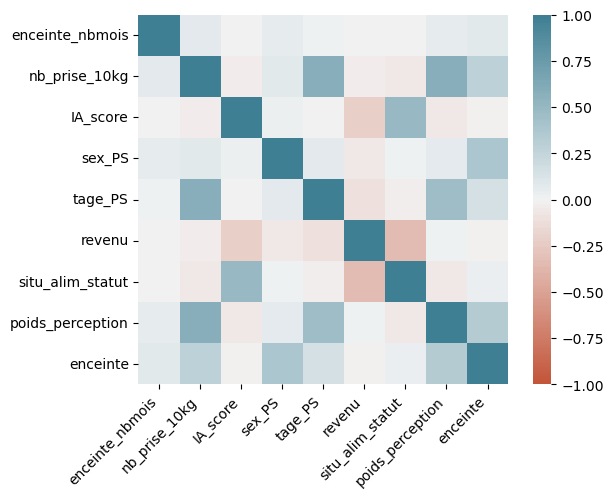

In [21]:
import seaborn as sns

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Nous pouvons maintenant passer à la modélisation ! Sachant qu'on a déjà une *pipeline* qui contient les instructions pour le preprocessing il est très simple de rajouter une étape supplémentaire à cette pipeline afin de réaliser la modélisation. Pour estimer une régression linéaire nous allons utiliser une nouvelle fois une méthode de scikit-learn: `LinearRegression`. 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe_lr = Pipeline([
    ('preprocessor', preprocessor_regression), # 1ère étape réaliser le preprocessing
    ('regression', LinearRegression()) # 2ème étape estime notre régression linéaire
])

Comme précédemment, notre pipeline n'a pas été exécutée, nous l'avons seulement définie. Il est donc nécessaire de l'executer sur nos données grâce à la méthode `fit`.

In [23]:
lr = pipe_lr.fit(X_train_regression, y_train)

**Question 9:** Prédisez les indices de masse corporelles des individus de votre échantillon de test à l'aide de votre modèle. Evaluez le en calculant l'écart quadratique moyen (RMSE) et le R2.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = # YOUR CODE
rmse = # YOUR CODE
r2 = # YOUR CODE
print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test_regression)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")

Le RMSE sur le jeu de test est : 4.3542
Le R2 sur le jeu de test est : 0.4517


<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test_regression)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
```

</details>

Il est difficile d'interpréter la valeur absolue du RMSE car il dépend de l'échelle et de la volatilité des données que nous cherchons à prédire. Regardons quelques statistiques de nl'IMC de nos individus de l'échantillons de test.

In [28]:
print(f"La variance de l'IMC de jeu de test est : {round(y_test.var(), 4)}")
print(f"La moyenne de l'IMC de jeu de test est : {round(y_test.mean(), 4)}")
print(f"L'écart interquartile de l'IMC de jeu de test est : {round(y_test.quantile(0.75) - y_test.quantile(0.25), 4)}")


La variance de l'IMC de jeu de test est : 34.6071
La moyenne de l'IMC de jeu de test est : 22.3912
L'écart interquartile de l'IMC de jeu de test est : 8.1963


On peut donc normaliser notre RMSE par l'une de ces statistiques pour avoir une idée plus précise des erreurs. La variance et la moyenne sont généralement les plus utilisées pour normaliser le RMSE.

In [29]:
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")


Le RMSE sur le jeu de test équivaut à 12.58% de la variance de l'échantillon.


Une autre méthode qu'on ne saurait que vous recommander est une nouvelle fois la représentation graphique ! 

**Question 10:** Représentez graphiquement les valeurs prédites par rapport aux vraies valeurs.

In [ ]:
import matplotlib.pyplot as plt

# YOUR CODE

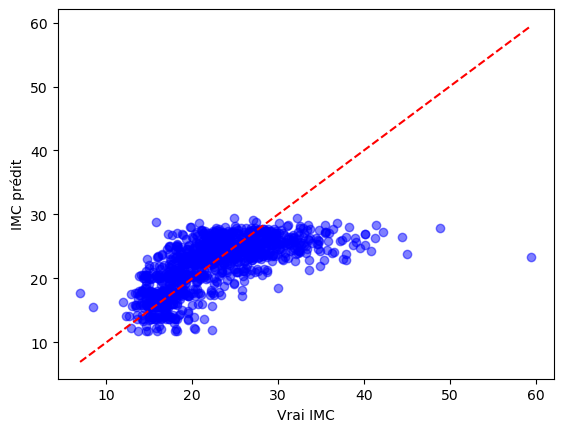

In [30]:
import matplotlib.pyplot as plt

# Creer le scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Ajout des labels
plt.xlabel('Vrai IMC')
plt.ylabel('IMC prédit')

# Ajout de la ligne à 45° comme référence
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Affichagedu graphique
plt.show()

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
import matplotlib.pyplot as plt

# Creer le scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Ajout des labels
plt.xlabel('Vrai IMC')
plt.ylabel('IMC prédit')

# Ajout de la ligne à 45° comme référence
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Affichagedu graphique
plt.show()
```

</details>

**Question 11:** Commentez le graphique.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## 3. Méthodes de Machine Learning

### 3.1 Random Forest Regression


Grâce à scikit learn, on va voir qu'il est très facile d'utiliser des méthodes de machine learning différentes maintenant qu'on a utilisé les fonctions de base lors de la régression linéaire. 
Nous allons maintenant essayer d'utiliser l'intégralité des variables qui nous sont disponibles dans la base de données initiale. Cela implique de se replonger un petit peu dans l'analyse des données. Nous avons vu précédemment que toutes les variables numériques ne pouvaient pas être imputées par la médiane et que dans certains cas une imputation par 0 est préférable. 

**Question 12:** Répertoriez l'ensemble des variables numériques à imputer par 0 dans une liste.

In [9]:
NUMERICAL_0_IMPUT = [
    # YOUR CODE
    ]

In [31]:
NUMERICAL_0_IMPUT = [
    "enceinte_nbmois", "nb_prise_10kg", "nb_cigarettes_jour",  
    "nb_cigarettes_sem", "nb_cigares_jour", "nb_cigares_sem", 
    "nb_pipes_jour", "nb_pipes_sem", "allaite_nbsem", 
    "regime_nb_2dernann", "regime_nb_anter2dernann"
    ]

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
NUMERICAL_0_IMPUT = [
    "enceinte_nbmois", "nb_prise_10kg", "nb_cigarettes_jour",  
    "nb_cigarettes_sem", "nb_cigares_jour", "nb_cigares_sem", 
    "nb_pipes_jour", "nb_pipes_sem", "allaite_nbsem", 
    "regime_nb_2dernann", "regime_nb_anter2dernann"
    ]
```

</details>

**Question 13:** En vous aidant de ce qui a été fait précédemment, construisez un objet `preprocessor` qui imputera correctement toutes les variables de notre jeu de données d'entrainement, à savoir `X_train`.

In [11]:
# YOUR CODE

In [32]:
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())
categorical_encoder = make_pipeline(minus_one_imputer, StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, NUMERICAL_0_IMPUT),
        ("numerical_median", numerical_median, [x for x in NUMERICAL if x not in NUMERICAL_0_IMPUT]),
        ("categorical", categorical_encoder, CATEGORICAL)
    ]
)

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
zero_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
minus_one_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

numerical_zero = make_pipeline(zero_imputer, StandardScaler())
numerical_median = make_pipeline(median_imputer, StandardScaler())
categorical_encoder = make_pipeline(minus_one_imputer, StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_zero", numerical_zero, NUMERICAL_0_IMPUT),
        ("numerical_median", numerical_median, [x for x in NUMERICAL if x not in NUMERICAL_0_IMPUT]),
        ("categorical", categorical_encoder, CATEGORICAL)
    ]
)
```

</details>

**Question 14:** De la même manière que ce qui a été fait en 2., construisez une pipeline qui preprocesse vos données avant d'estimer un modèle Random Forest. N'oubliez pas de spécifier un `random_state` pour pouvoir répliquer vos résultats.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pipe_rfr = # YOUR CODE

In [34]:
from sklearn.ensemble import RandomForestRegressor

pipe_rfr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', RandomForestRegressor(random_state=SEED))
])

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
pipe_rfr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', RandomForestRegressor(random_state=SEED))
])
```

</details>

Lorsque l'on entraine un modèle de machine on souhaite minimiser l'erreur de prédiction sur les données non utilisées lors de l'entrainement. Pour faire cela, il existe généralement 
plusieurs paramètres propres à chaque modèle que l'on peut faire varier de sorte à influer sur les performances. On utilise plus souvent le terme d'*hyperparamètre* que l'on cherche à *calibrer* (*fine-tune*), c'est-à-dire déterminer la combinaison d'hyperparamètres qui obtient la meilleure performance. Pour pouvoir calibrer ces hyperparamètres nous avons besoins de connaitre quels sont ceux des modèles Ra&ndom Forest, pour cela on peut utiliser la commande suivante : 

In [35]:
pipe_rfr['regression'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

On voit que `scikit-learn`fournit directement des valeurs par défauts pour ces hyperparamètres et ces valeurs par défaut sont généralement des bonnes valeurs pour commencer. En plus de ces paramètres par défaut nous allons également tester d'autres combinaisons avec la méthode dites de *grid search* qui consiste simplement à tester toutes les combinaisons possibles parmi un ensemble de valeurs pour chaque paramètre à optimiser. Pour le moment nous allons choisir les paramètres `n_estimators` et `max_leaf_nodes` dont vous pouvez retrouver la signification dans la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

In [37]:
param_grid = {
    "regression__n_estimators": [50, 100, 200],
    "regression__max_leaf_nodes": [5, 10, 50, None]
}

De sorte à limiter l'*overfitting* en calibrant les hyperparamètres nous allons également utiliser la méthode de *cross-validation* à 5 blocs (qui est très bien expliquée [ici](https://scikit-learn.org/stable/modules/cross_validation.html)). Pour effectuer tout cela, `scikit-learn` fournit une nouvelle fois une fonction particulièrement utile : `GridSearchCV()`.

In [39]:
from sklearn.model_selection import GridSearchCV

pipe_gscv = GridSearchCV(pipe_rfr, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)

**Question 14:** Pouvez vous deviner le nombre de `fit` total que nous allons effectuer lorsque nous allons appeler la méthode `fit` sur l'objet `pipe_rfr` ?

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

Pour le grid search nous avons $3*4=12$ modèles à entrainer. Cependant, pour chaque combinaison nous effectuons une cross validation à $5$ blocs ce qui implique 5 entrainements pour chaque combinaisons tester. A la fin, nous avons donc à entrainer $60$ modèles.

</details>

In [40]:
rfr = pipe_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [55]:
print(f"Meilleure combinaison retenue: {rfr.best_params_}")

Meilleure combinaison retenue: {'regression__max_leaf_nodes': None, 'regression__n_estimators': 200}


Il est possible d'accéder aux résultats de tous les modèles entrainés afin de comparer les performances.

In [ ]:
perf_random_forest = pd.DataFrame(rfr.cv_results_)
perf_random_forest

**Question 15:** Calculez les mêmes métriques que pour la régression linéaire et comparez la performance entre les deux modèles.

In [ ]:
# YOUR CODE

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")
```
</details>

In [57]:
y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")

Le RMSE sur le jeu de test est : 1.606
Le R2 sur le jeu de test est : 0.9254
Le RMSE sur le jeu de test équivaut à 4.64% de la variance de l'échantillon.


**Question 16:** Reproduisez le graphique représentant les valeurs prédites par rapport aux vraies valeurs et observez visuellement la différence de performance.

In [ ]:
# YOUR CODE

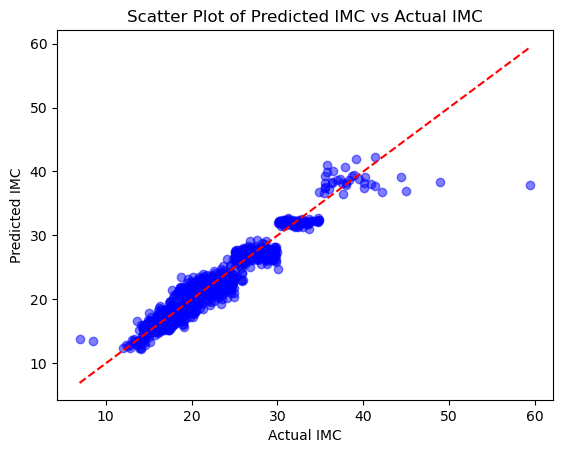

In [60]:
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()


<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual IMC')
plt.ylabel('Predicted IMC')
plt.title('Scatter Plot of Predicted IMC vs Actual IMC')

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Display the plot
plt.show()
```
</details>

### 3.2 D'autres méthodes de machine learning

L'une des grandes forces de `scikit-learn` est que tout a été pensé pour que les fonctions soient extrêmement modulaire. Ainsi, une fois que l'on a un preprocessing bien défini, il est très facile de tester différents modèles pour savoir lesquels sont les mieux adaptés à nos jeux de données. Nous allons maintenant appliquer 3 autres méthodes, à savoir : 
- Les **Support Vectors Machines** (SVM) : documentation [ici](https://scikit-learn.org/stable/modules/svm.html),
- L'**eXtreme Gradient Boosting** (XGBoost) : documentation [ici](https://xgboost.readthedocs.io/en/stable/),
- La régression par les **plus proches voisins** (KNN) : documentation [ici](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html),


**Question 17:** En reprenant la même trame que pour la méthode des *Random Forests*, essayez de trouver le modèle le plus performant en utilisant les **SVM**.

In [ ]:
from sklearn.svm import SVR
# YOUR CODE

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from sklearn.svm import SVR

pipeline_svr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', SVR())
])

param_grid = {
    "regression__C": np.logspace(-8, 8, 9, base=2), 
    "regression__kernel": ["rbf"],
    "regression__gamma": [0.01],
}

pipe_gscv = GridSearchCV(pipeline_svr, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)
                         
svr = pipe_gscv.fit(X_train, y_train)
print(f"Meilleure combinaison retenue: {svr.best_params_}")

y_pred = svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")
```
</details>

In [62]:
from sklearn.svm import SVR

pipeline_svr = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', SVR())
])

param_grid = {
    "regression__C": np.logspace(-8, 8, 9, base=2), 
    "regression__kernel": ["rbf"],
    "regression__gamma": [0.01],
}

pipe_gscv = GridSearchCV(pipeline_svr, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)
                         
svr = pipe_gscv.fit(X_train, y_train)
print(f"Meilleure combinaison retenue: {svr.best_params_}")

y_pred = svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleure combinaison retenue: {'regression__C': 16.0, 'regression__gamma': 0.01, 'regression__kernel': 'rbf'}
Le RMSE sur le jeu de test est : 2.1584
Le R2 sur le jeu de test est : 0.8653
Le RMSE sur le jeu de test équivaut à 6.24% de la variance de l'échantillon.


**Question 18:** De même, essayez de trouver le modèle le plus performant en utilisant le **XGBoost**.

In [ ]:
from xgboost import XGBRegressor
# YOUR CODE

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from xgboost import XGBRegressor

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', XGBRegressor())
])

param_grid = {
    "regression__max_leaves": [5, 10, 25],
    "regression__max_depth": [2, 3, 5],
    "regression__gamma": [0.1, 0.25, 0.5],
    "regression__n_estimators": [75, 150, 250],
}

pipe_gscv = GridSearchCV(pipeline_xgb, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)
                         
xgb = pipe_gscv.fit(X_train, y_train)
print(f"Meilleure combinaison retenue: {xgb.best_params_}")

y_pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")
```
</details>

In [64]:
from xgboost import XGBRegressor

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', XGBRegressor())
])

param_grid = {
    "regression__max_leaves": [5, 10, 25],
    "regression__max_depth": [2, 3, 5],
    "regression__gamma": [0.1, 0.25, 0.5],
    "regression__n_estimators": [75, 150, 250],
}

pipe_gscv = GridSearchCV(pipeline_xgb, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)
                         
xgb = pipe_gscv.fit(X_train, y_train)
print(f"Meilleure combinaison retenue: {xgb.best_params_}")

y_pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleure combinaison retenue: {'regression__gamma': 0.25, 'regression__max_depth': 5, 'regression__max_leaves': 5, 'regression__n_estimators': 75}
Le RMSE sur le jeu de test est : 1.5933
Le R2 sur le jeu de test est : 0.9266
Le RMSE sur le jeu de test équivaut à 4.6% de la variance de l'échantillon.


**Question 19:** De même, essayez de trouver le modèle le plus performant en utilisant les **K plus proches voisins**.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# YOUR CODE

<details>
<summary>
    <font size=3 color="red"><b>Click to see the answer </b></font>
</summary>

```python
from sklearn.neighbors import KNeighborsRegressor

pipeline_knn = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', KNeighborsRegressor())
])

param_grid = {
    "regression__n_neighbors": [3, 4, 5, 6],
    "regression__p": [1, 2, 3],
}

pipe_gscv = GridSearchCV(pipeline_knn, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)
                         
knn = pipe_gscv.fit(X_train, y_train)
print(f"Meilleure combinaison retenue: {knn.best_params_}")

y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")
```
</details>

In [66]:
from sklearn.neighbors import KNeighborsRegressor

pipeline_knn = Pipeline([
    ('preprocessor', preprocessor), 
    ('regression', KNeighborsRegressor())
])

param_grid = {
    "regression__n_neighbors": [3, 4, 5, 6],
    "regression__p": [1, 2, 3],
}

pipe_gscv = GridSearchCV(pipeline_knn, 
                         param_grid=param_grid, 
                         scoring=["explained_variance", "r2", "neg_root_mean_squared_error"],
                         refit="neg_root_mean_squared_error",
                         cv=5, 
                         n_jobs=-1, 
                         verbose=1)
                         
knn = pipe_gscv.fit(X_train, y_train)
print(f"Meilleure combinaison retenue: {knn.best_params_}")

y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Le RMSE sur le jeu de test est : {round(rmse, 4)}")
print(f"Le R2 sur le jeu de test est : {round(r2, 4)}")
print(f"Le RMSE sur le jeu de test équivaut à {round(rmse / y_test.var() * 100 , 2)}% de la variance de l'échantillon.")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleure combinaison retenue: {'regression__n_neighbors': 6, 'regression__p': 2}
Le RMSE sur le jeu de test est : 3.4711
Le R2 sur le jeu de test est : 0.6516
Le RMSE sur le jeu de test équivaut à 10.03% de la variance de l'échantillon.


## 4. Pour aller plus loin